# Módulo 5 Actividad 7

## Intención del aprendizaje esperado:


### 7. Elabora un modelo predictivo aplicando el algoritmo clasificador Bayesiano para resolver un problema de clasificación utilizando lenguaje Python.

## Ejercicios Planteados

**Cargue el dataset adult.csv y desarrolle un modelo predictivo Naive Bayes considerando los siguientes puntos:**

**1. Importar datos**


**2. Análisis Exploratorio**


In [92]:
import pandas as pd

adultos = pd.read_csv('adult.csv')
adultos.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [93]:
pd.options.display.float_format = '{:.0f}'.format

adultos.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842,48842,48842,48842,48842,48842
mean,39,189664,10,1079,88,40
std,14,105604,3,7452,403,12
min,17,12285,1,0,0,1
25%,28,117550,9,0,0,40
50%,37,178144,10,0,0,40
75%,48,237642,12,0,0,45
max,90,1490400,16,99999,4356,99


In [94]:

print(' INFORMACION DE DF '.center(50, '='))
print()
print(adultos.info())
print()
print(' COLUMNAS CON REGISTRO "?" '.center(50, '='))
print()
interrogacion = adultos.apply(lambda col: col.astype(str).str.contains('\?', regex=True).any())
print(interrogacion)
print()
print('=' * 50)


=============== INFORMACION DE DF ================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

=========== COLUMN

In [95]:
interrogacion_workclass = adultos['workclass'].str.count('\?').sum()
interrogacion_occupation = adultos['occupation'].str.count('\?').sum()
interrogacion_native_country = adultos['native-country'].str.count('\?').sum()

print(' Cantidad de Registros "?" por Columnas '.center(70, '='))
print()
print(f'La cantidad de registros "?" en la columna "workclass" es: {interrogacion_workclass}')
print(f'La cantidad de registros "?" en la columna "occupation" es: {interrogacion_occupation}')
print(f'La cantidad de registros "?" en la columna "native-country" es: {interrogacion_native_country}')
print()
print('=' * 70)

=============== Cantidad de Registros "?" por Columnas ===============

La cantidad de registros "?" en la columna "workclass" es: 2799
La cantidad de registros "?" en la columna "occupation" es: 2809
La cantidad de registros "?" en la columna "native-country" es: 857



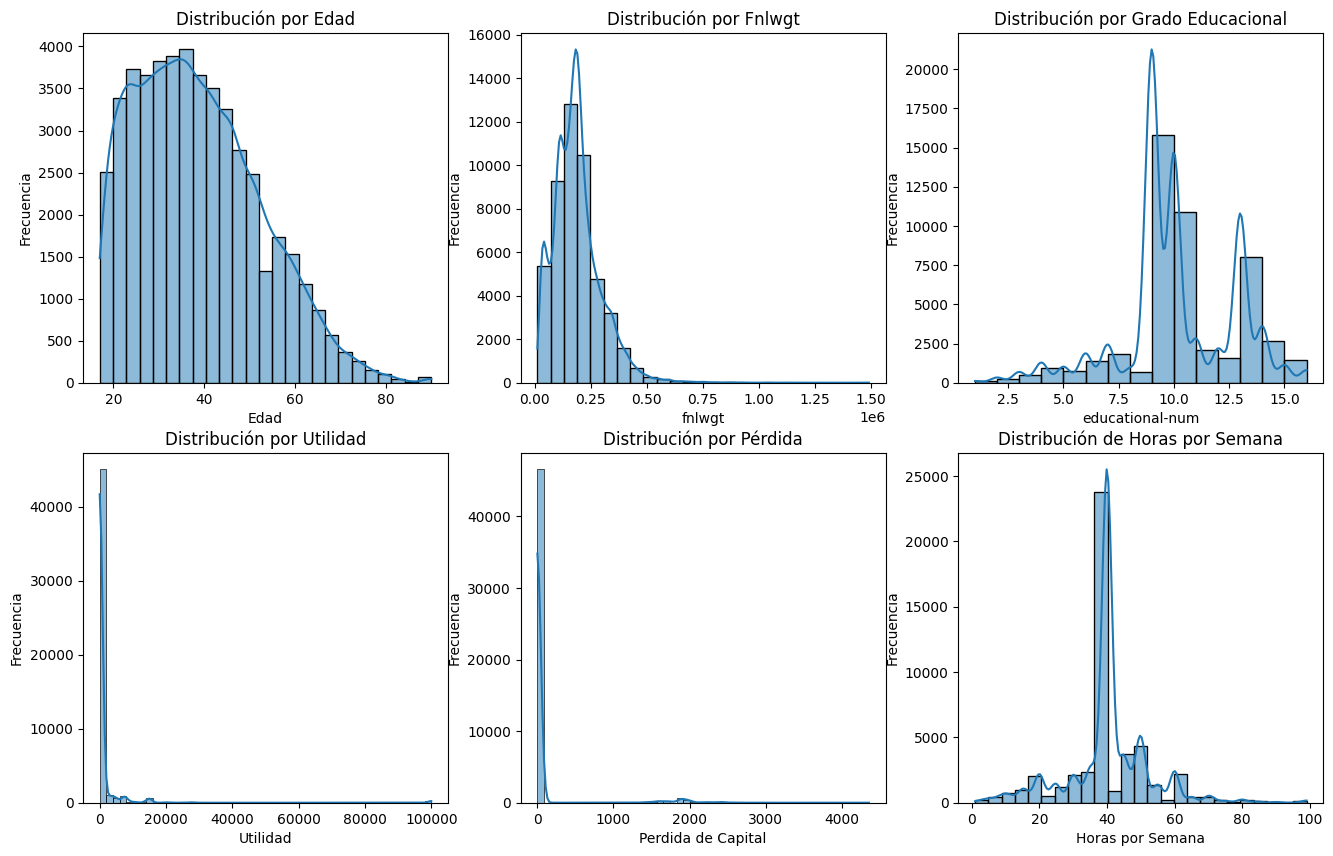

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

figure, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.histplot(data=adultos['age'], ax=axes[0, 0], bins=25, kde=True)
axes[0, 0].set_title('Distribución por Edad')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

sns.histplot(data=adultos['fnlwgt'], ax=axes[0, 1], bins=25, kde=True)
axes[0, 1].set_title('Distribución por Fnlwgt')
axes[0, 1].set_xlabel('fnlwgt')
axes[0, 1].set_ylabel('Frecuencia')

sns.histplot(data=adultos['educational-num'], ax=axes[0, 2], bins=15, kde=True)
axes[0, 2].set_title('Distribución por Grado Educacional')
axes[0, 2].set_xlabel('educational-num')
axes[0, 2].set_ylabel('Frecuencia')

sns.histplot(data=adultos['capital-gain'], ax=axes[1, 0], bins=50, kde=True)
axes[1, 0].set_title('Distribución por Utilidad')
axes[1, 0].set_xlabel('Utilidad')
axes[1, 0].set_ylabel('Frecuencia')

sns.histplot(data=adultos['capital-loss'], ax=axes[1, 1], bins=50, kde=True)
axes[1, 1].set_title('Distribución por Pérdida')
axes[1, 1].set_xlabel('Perdida de Capital')
axes[1, 1].set_ylabel('Frecuencia')

sns.histplot(data=adultos['hours-per-week'], ax=axes[1, 2], bins=25, kde=True)
axes[1, 2].set_title('Distribución de Horas por Semana')
axes[1, 2].set_xlabel('Horas por Semana')
axes[1, 2].set_ylabel('Frecuencia')

plt.show()

In [97]:
adultos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,48842,39,14,17,28,37,48,90
fnlwgt,48842,189664,105604,12285,117550,178144,237642,1490400
educational-num,48842,10,3,1,9,10,12,16
capital-gain,48842,1079,7452,0,0,0,0,99999
capital-loss,48842,88,403,0,0,0,0,4356
hours-per-week,48842,40,12,1,40,40,45,99


In [98]:
adultos.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [99]:
adultos.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


En resumen, tenemos 15 variables de las cuales 9 son categóricas y 6 son numéricas.

**3. Definición de features y target**


In [100]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
adultos['workclass'] = le.fit_transform(adultos['workclass'])
adultos['marital.status'] = le.fit_transform(adultos['marital-status'])
adultos['occupation'] = le.fit_transform(adultos['occupation'])
adultos['relationship'] = le.fit_transform(adultos['relationship'])
adultos['race'] = le.fit_transform(adultos['race'])
adultos['gender'] = le.fit_transform(adultos['gender'])
adultos['native-country'] = le.fit_transform(adultos['native-country'])
adultos['income'] = le.fit_transform(adultos['income'])

adultos.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,marital.status
0,25,4,226802,11th,7,Never-married,7,3,2,1,0,0,40,39,0,4
1,38,4,89814,HS-grad,9,Married-civ-spouse,5,0,4,1,0,0,50,39,0,2
2,28,2,336951,Assoc-acdm,12,Married-civ-spouse,11,0,4,1,0,0,40,39,1,2
3,44,4,160323,Some-college,10,Married-civ-spouse,7,0,2,1,7688,0,40,39,1,2
4,18,0,103497,Some-college,10,Never-married,0,3,4,0,0,0,30,39,0,4
